In [829]:
import os
import json
import cv2
import numpy as np
import torch
from torchvision import models, transforms
from PIL import Image
from os import mkdir,path
from shutil import rmtree
import matplotlib.pyplot as plt
# %matplotlib inline

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## prepare folders

In [830]:
image_index=6

In [831]:
if path.isdir('test'):
    rmtree('test')
if path.isdir('results'):
    rmtree('results')

In [832]:
mkdir('test')
mkdir('results')

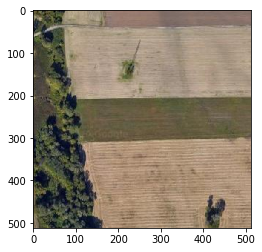

In [833]:
small_image=Image.open('data/{}_small.png'.format(image_index)).convert('RGB')
small_image.save('test/small.png')

big_image=Image.open('data/{}_big.png'.format(image_index)).convert('RGB')
big_image_cv2_plis=cv2.imread('data/{}_big.png'.format(image_index))

plt.imshow(big_image)

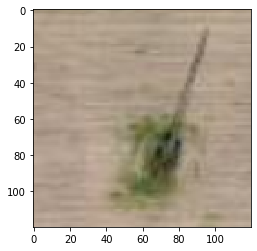

In [834]:
plt.imshow(small_image)

## prepare einvironemnt

In [835]:
# with open('data/data_compute/data.json') as json_file:
#     json_data=json.load(json_file)
#     print(json_data['objects'][0]['id'])
    
# print(json_data)


In [836]:
# def computeSquareError(top_pred,left_pred,bottom_pred,right_pred,goodObj):
#     small_width,small_height=small_image.size
#     big_width,big_height=big_image.size
    
    
    
#     topErr= (goodObj['top']-top_pred)**2
#     leftErr= (goodObj['left']-left_pred)**2
#     rightErr=((big_width-goodObj['left']-small_width) - left_pred)**2
#     bottomErr=((big_height-goodObj['top']-big_height) - bottom_pred)**2
    
#     return topErr+leftErr+rightErr+bottomErr


In [837]:
isFound=False

## transforms

In [838]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

data_transforms_small = transforms.Compose([
    transforms.CenterCrop(64),
    # below are for tests
#     transforms.ColorJitter(brightness=1,contrast=1,saturation=1),
    transforms.ToTensor(),
    normalize
])

data_transforms_big = transforms.Compose([
    transforms.ToTensor(),
    normalize
])

In [839]:
big_image_transform=data_transforms_big(big_image)
plt.imsave('test/big.png',big_image_transform.numpy()[0])

big_image_transform=big_image_transform.numpy().transpose(1, 2, 0)
big_image_transform=big_image_transform.astype(np.float32)


In [840]:
small_images_torch=[]

In [841]:
for rotate_angle in range(0,360,10):
    small_image_transform=small_image.resize((85,85),Image.ANTIALIAS).rotate(rotate_angle)
    small_image_transform.save('test/zzz{}.png'.format(rotate_angle))
    
    small_image_torch = data_transforms_small(small_image_transform)
    
    if rotate_angle%20==0:
        plt.imsave('test/test-{}.png'.format(rotate_angle),small_image_torch.numpy()[0])
        
    
    small_images_torch.append(small_image_torch.unsqueeze(0))

## cv2 template

In [842]:
for torch_image in small_images_torch:
    template_image=torch_image[0].numpy().transpose(1, 2, 0)
    template_image=template_image.astype(np.float32)
    
    w, h = template_image.shape[:-1]
    
    result = cv2.matchTemplate(big_image_transform, template_image, cv2.TM_CCOEFF_NORMED)
  
    threshold = 0.72
    loc = np.where(result >= threshold)
    last_pt=(0,0)
    
    for pt in zip(*loc[::-1]): 
        if isFound==False:
            print(pt)
       
        
#         if (last_pt[0]!=pt[0] and last_pt[0]!=pt[0]+1) and (last_pt[1]!=pt[1] and last_pt[1]!=pt[1]+1):
        if abs(last_pt[0]-pt[0])>10 and abs(last_pt[1]-pt[1])>10:
            isFound=True
            cv2.rectangle(big_image_cv2_plis, pt, (pt[0]+ h, pt[1]+ w),(0, 0, 255), 1)
#             print(pt)
            last_pt=pt
            
#         squareErr=computeSquareError(pt[1],pt[0],
#                                      big_image.size[1]-pt[1]-h,
#                                      big_image.size[0]-pt[0]-w,
#                                      json_data['objects'][1])
#         json_data['squareError']+=squareErr
#         json_data['operations']+=1


(191, 79)


In [843]:
if isFound:
    print('Get sth')

Get sth


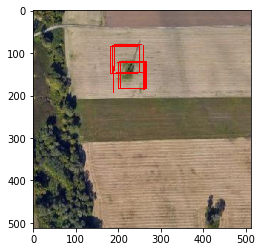

In [844]:
cv2.imwrite('results/finall_image.png', big_image_cv2_plis)
plt.imshow(big_image_cv2_plis[:,:,::-1])

In [845]:
# print('end',json_data['squareError'])
# print(json_data)
# print(json_data['squareError']/json_data['operations'])

In [846]:
print('end')

end
